In [76]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import missingno

In [92]:
votes_df = pd.read_csv("data/votes.csv").T
votes_df

0      1      2      3      4      5      6      7      8      9    
X1856    NaN    NaN    NaN    NaN  18.77    NaN  53.18   2.11    NaN    NaN  \
X1860    NaN    NaN    NaN    NaN  32.96    NaN  53.86  23.71    NaN    NaN   
X1864    NaN    NaN    NaN    NaN  58.63    NaN  51.38  48.20    NaN    NaN   
X1868  51.44    NaN    NaN  53.73  50.24    NaN  51.54  40.98    NaN  35.72   
X1872  53.19    NaN    NaN  52.17  56.38    NaN  52.25  50.99  53.52  43.77   
X1876  40.02    NaN    NaN  39.88  50.88    NaN  48.34  44.55  50.99  27.94   
X1880  36.98    NaN    NaN  39.55  48.92  51.28  50.52  47.86  45.83  34.33   
X1884  38.44    NaN    NaN  40.50  52.08  54.39  48.01  42.75  46.82  33.84   
X1888  32.28    NaN    NaN  38.07  49.95  55.31  48.44  43.55  39.94  28.33   
X1892   3.95    NaN    NaN  32.01  43.76  41.13  46.80  48.55    NaN  21.80   
X1896  28.13    NaN    NaN  25.11  49.13  13.84  63.24  52.94  24.30  36.82   
X1900  34.67    NaN    NaN  35.04  54.48  42.04  56.94  53.65  19.03  28.56   
X1904  20.65    NaN    NaN  40.25  61.90  55.27  58.13  54.04  21.15  18.32   
X1908  24.38    NaN    NaN  37.31  55.46  46.88  59.43  52.09  21.58  31.40   
X1912   8.26    NaN  12.74  19.73   0.58  21.88  35.88  32.85   8.25   4.27   
X1916  21.97    NaN  35.37  28.01  46.26  34.75  49.80  50.20  18.08   7.07   
X1920  30.98    NaN  55.41  38.73  66.24  59.32  62.72  55.71  30.79  28.57   
X1924  27.01    NaN  41.26  29.28  57.21  57.02  61.54  57.71  28.06  18.19   
X1928  48.49    NaN  57.57  39.33  64.70  64.72  53.63  65.03  56.83  43.37   
X1932  14.15    NaN  30.53  12.91  37.40  41.43  48.54  50.55  25.04   7.77   
X1936  12.82    NaN  26.93  17.86  31.70  37.09  40.35  43.43  23.85  12.60   
X1940  14.34    NaN  36.01  20.87  41.35  50.92  46.30  45.05  25.99  14.84   
X1944  18.20    NaN  40.90  29.84  42.99  53.21  46.94  45.27  29.68  18.25   
X1948  19.04    NaN  43.82  21.02  47.14  46.52  49.55  50.04  33.63  18.31   
X1952  35.02    NaN  58.35  43.76  56.39  60.27  55.70  51.75  55.01  30.34   
X1956  39.39    NaN  60.99  45.82  55.40  59.49  63.73  55.09  57.20  33.22   
X1960  41.75  50.94  55.52  43.06  50.10  54.63  46.27  49.00  51.51  37.44   
X1964  69.50  34.10  50.40  43.90  40.90  38.70  32.20  39.10  48.90  54.10   
X1968  14.00  45.30  54.80  30.80  47.80  50.50  44.30  45.10  40.50  30.40   
X1972  72.40  58.10  64.70  68.90  55.00  62.60  58.60  59.60  71.90  75.00   
X1976  43.48  62.91  58.62  34.97  50.89  55.89  52.64  47.27  46.83  33.02   

       ...     40     41     42     43     44     45     46     47     48   
X1856  ...    NaN    NaN    NaN    NaN  78.23   0.19    NaN    NaN  55.29  \
X1860  ...    NaN    NaN    NaN    NaN  75.79   1.15    NaN    NaN  56.58   
X1864  ...    NaN    NaN    NaN    NaN  76.10    NaN    NaN  68.95  55.88   
X1868  ...    NaN  68.33    NaN    NaN  78.57    NaN    NaN  58.84  56.24   
X1872  ...    NaN  47.57  40.71    NaN  78.26  50.48    NaN  51.82  54.60   
X1876  ...    NaN  40.21  29.96    NaN  68.58  40.62    NaN  42.47  50.90   
X1880  ...    NaN  44.53  23.95    NaN  69.88  39.52    NaN  41.03  54.04   
X1884  ...    NaN  47.83  28.63    NaN  66.54  48.90    NaN  47.74  50.38   
X1888  ...    NaN  45.85  24.73    NaN  71.24  49.47    NaN  49.03  49.77   
X1892  ...  49.48  37.51  19.28    NaN  68.10  38.75  41.45  46.94  46.02   
X1896  ...  49.48  46.23  30.75  17.27  80.10  45.90  41.84  52.23  59.93   
X1900  ...  56.73  44.93  30.83  50.59  75.79  43.81  53.44  54.27  60.04   
X1904  ...  71.09  43.40  21.90  61.45  77.98  36.67  69.95  55.26  63.24   
X1908  ...  58.84  45.95  22.35  56.19  75.12  38.36  57.47  53.41  54.52   
X1912  ...    NaN  23.84   8.77  37.46  37.13  17.00  21.82  21.10  32.68   
X1916  ...  49.80  42.70  17.45  37.82  62.44  32.05  43.89  49.38  49.25   
X1920  ...  60.74  51.28  23.54  55.93  75.87  37.85  55.96  55.30  70.65   
X1924  ...  49.69  43.59  19.78  49.26  78.22  32.79  52.24  49.45  37.06   
X1928  ...  60.18 

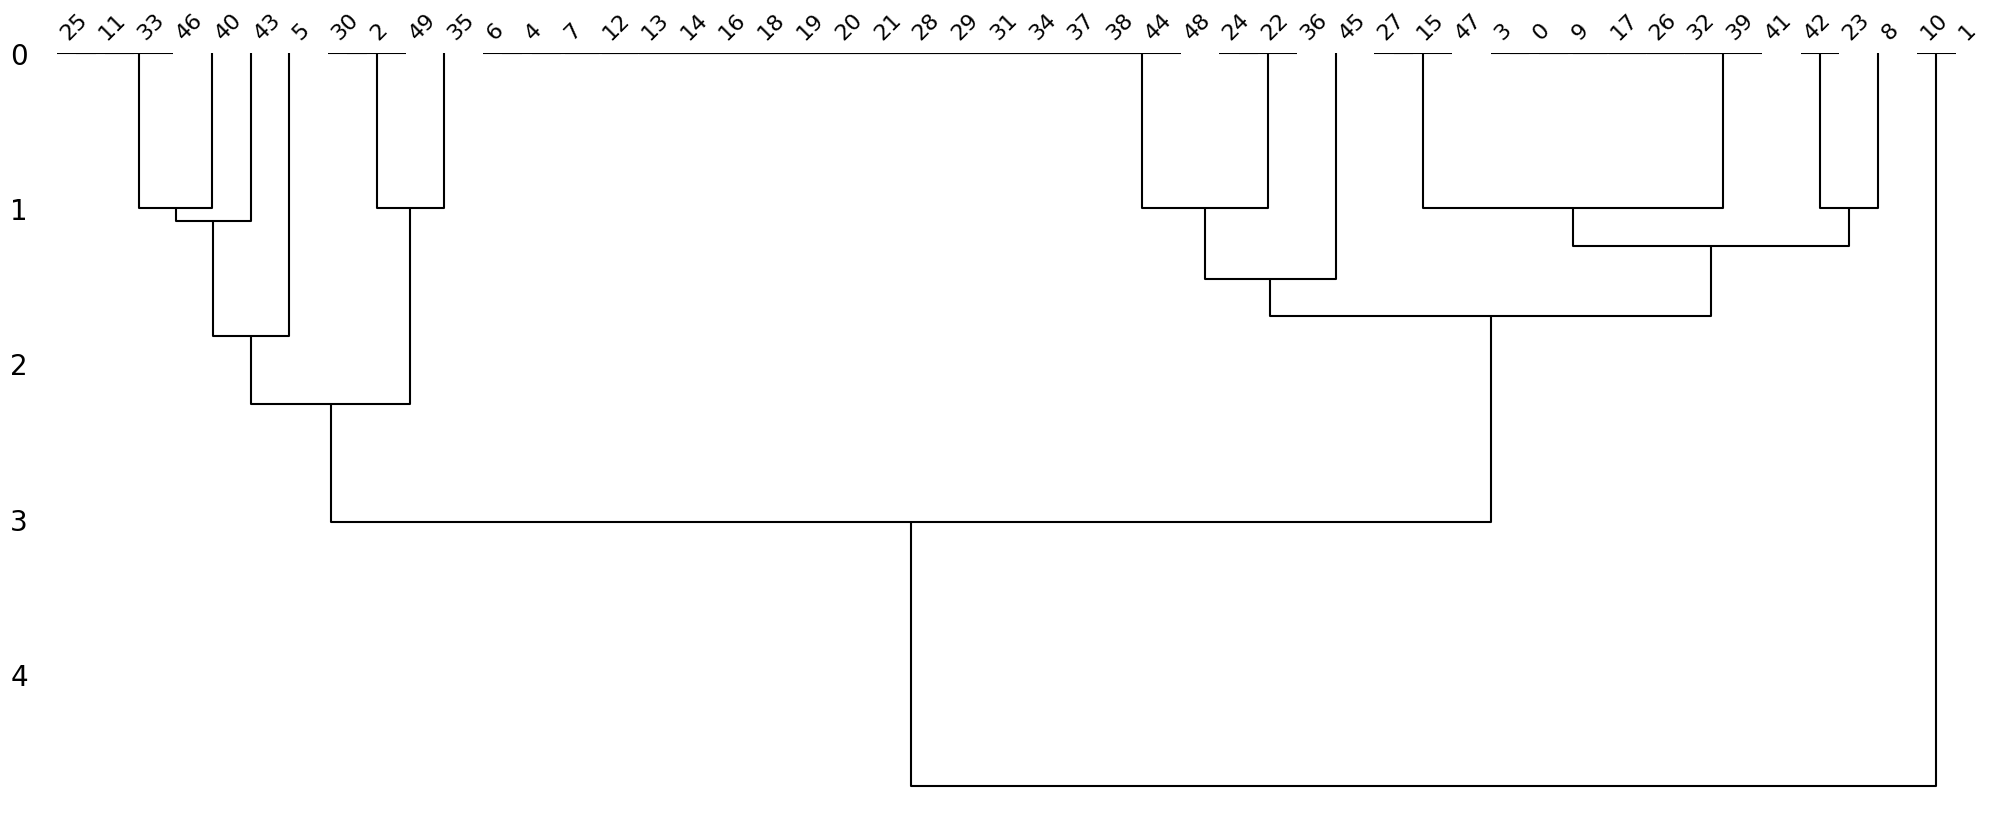

In [93]:
missingno.dendrogram(votes_df)
plt.show()